In [51]:
import sys
import os

# modify syspath directory to sys.path

package_path = os.path.abspath(os.path.join('..','core'))
if package_path not in sys.path:
    sys.path.append(package_path)

package_path = os.path.abspath(os.path.join('..','utils'))
if package_path not in sys.path:
    sys.path.append(package_path)

package_path = os.path.abspath(os.path.join('..'))
if package_path not in sys.path:
    sys.path.append(package_path)

import numpy as np
import qutip as qt
import math
import matplotlib.pyplot as plt

from IPython.display import HTML # both needed to disply gifs
from PIL import Image

# Import modules from the package
from core import create_hamiltonian as ch
from core import create_state as cs
from core import time_evo
from core import time_evo_new
from core import load_param
from core import load_H_list
from core import load_result
from core import load_tlist
from core.schmidt_solve import compute_schmidt_states_all_time
from core.eigen_ener_states import eigen_ener_states as eig
from utils.entropy import compute_VN, plot_VN, compute_VN_time
from utils import collapse_gif
from utils.collapse_gif import collapse_gif
from utils.display_gif import display_gif
from utils.distribution_gif import gif_distribution_eig_total
from utils.distribution_gif import prob_gif
from utils.plot import plot_basic
from utils.plot import plot_with_binning
from utils.basic_functions import state_distribution_eig_tot
from utils.basic_functions import random_dephasing
from utils.basic_functions import get_state_probabilities
from utils.overlap import overlap
from utils.overlap import gif_schmidt_overlap
from utils.interference import interference_plot
from utils.expectations import exp_val_time
from utils.plot_hamiltonians import plot_hamiltonians


/usr/local/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


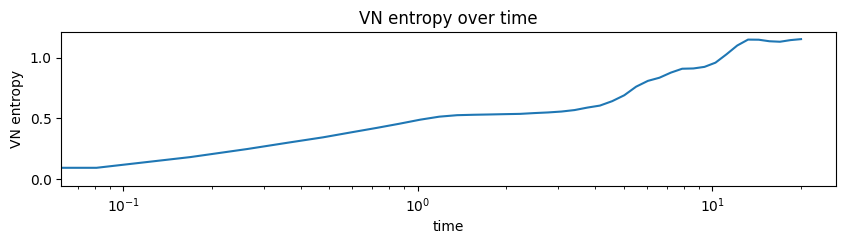

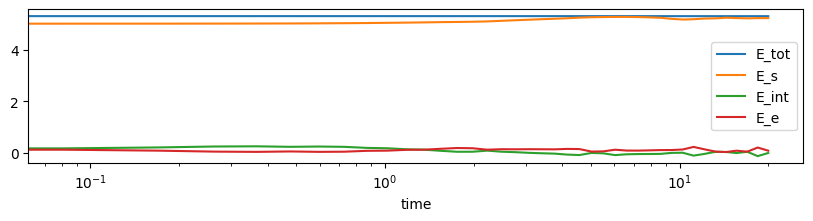

In [62]:
file_name = "coherent_state_decoherence"
d1, d2, E_s, E_s2, E_int_s, E_int_e, E_int_s2, E_int_e2, E_e, E_e2, envi, tmax, ind_nb, log = load_param(file_name)

#file_name="ACL_3_extended"
#d1, d2, E_s, E_s2, E_int_s, E_int_e, E_int_s2, E_int_e2, E_e, E_e2, w, envi, tmax, ind_nb, log = load_param(file_name)
info = load_param(file_name)
H_list=load_H_list(file_name)
result=load_result(file_name)
tlist=load_tlist(file_name)
plot_VN(result,tlist,1)
plt.show()
[E_tot,E_s,E_int,E_e]=exp_val_time(result, H_list, tlist)
plt.figure(figsize=(10, 2))
plt.plot(tlist,E_tot)
plt.plot(tlist,E_s)
plt.plot(tlist,E_int)
plt.plot(tlist,E_e)
plt.xscale("log")
plt.xlabel("Time")
plt.legend(["E_tot","E_s","E_int","E_e"])
plt.show()

#plot_hamiltonians(H_list)

In [53]:
#eigen = eig(H_list)
s_list = compute_schmidt_states_all_time(result, ind_nb)
ss_list = s_list[0]
se_list= s_list[1]
sv_list = s_list[2]
s_full_list=s_list[3]

In [65]:

def exp_val_time_world(world, H_list, tlist):
    #This function will take the schmidt state's history and compute energies there. so we will  need to run it twice times to get that for the first 2 worlds
    #TODO make this call exp_val
    exp_val_time = []
    E_tot=[]
    E_s=[]
    E_int=[]
    E_e=[]

    for i in range(len(tlist)-1):
        E_tot.append(qt.expect(H_list[1],qt.Qobj(world[i])))
        E_s.append(qt.expect(H_list[2],qt.Qobj(world[i])))
        E_int.append(qt.expect(H_list[3],qt.Qobj(world[i])))
        E_e.append(qt.expect(H_list[4],qt.Qobj(world[i])))

    exp_val_time = [E_tot, E_s, E_int, E_e]        
    return exp_val_time




In [66]:
#We start by reconstructing worlds, 

def s_full_list_new_qt(ss_list,se_list, idx):
    l=len(ss_list)
    s_full_list_new=[]
    for i in range(l-1):
            ss=qt.Qobj(ss_list[i+1][idx])
            se=qt.Qobj(se_list[i+1][idx])
            s_full=qt.tensor(ss,se)
            s_full_list_new.append(s_full)
    return s_full_list_new
s_full_list_1=s_full_list_new_qt(ss_list,se_list,0)
s_full_list_2=s_full_list_new_qt(ss_list,se_list,1)


In [67]:
def worlds(s_full_list, ind_nb,index):
    #Takes the history of a system schmidt state and the history of the matching environment schmidt state and sticks them together.
    world_list=[]
    for i in range(ind_nb-1):
        world_list.append(s_full_list[i])
    return world_list
w1_list=worlds(s_full_list_1, ind_nb,0)
w2_list=worlds(s_full_list_2, ind_nb,1)
print(w1_list[0])

Quantum object: dims = [[30, 300], [1, 1]], shape = (9000, 1), type = ket
Qobj data =
[[-6.84810805e-04+1.07085354e-04j]
 [-1.54398612e-04+2.98271194e-04j]
 [-8.76378019e-04+3.03677865e-04j]
 ...
 [-1.93675096e-06+7.23476793e-06j]
 [-1.64724233e-06-1.91242045e-06j]
 [-6.55482285e-06-8.38155066e-06j]]


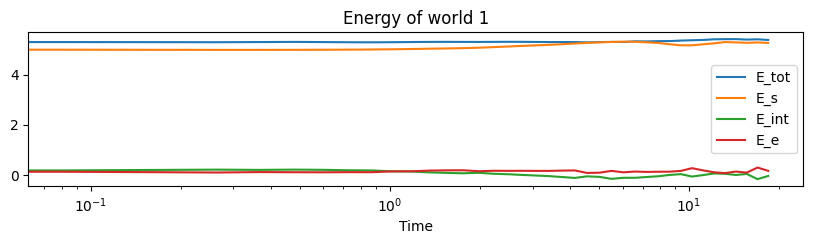

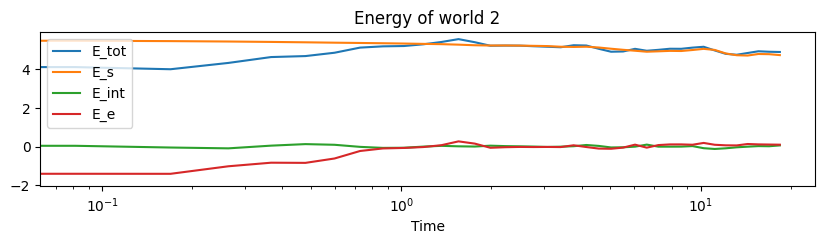

In [68]:

[E_tot_w1,E_s_w1,E_int_w1,E_e_w1]=exp_val_time_world(w1_list, H_list, tlist)
[E_tot_w2,E_s_w2,E_int_w2,E_e_w2]=exp_val_time_world(w2_list, H_list, tlist)
plt.figure(figsize=(10, 2))
plt.plot(tlist[:-1],E_tot_w1)
plt.plot(tlist[:-1],E_s_w1)
plt.plot(tlist[:-1],E_int_w1)
plt.plot(tlist[:-1],E_e_w1)
plt.title("Energy of world 1")
plt.xscale("log")
plt.xlabel("Time")
plt.legend(["E_tot","E_s","E_int","E_e"])
plt.show()

plt.figure(figsize=(10, 2))
plt.plot(tlist[:-1],E_tot_w2)
plt.plot(tlist[:-1],E_s_w2)
plt.plot(tlist[:-1],E_int_w2)
plt.plot(tlist[:-1],E_e_w2)
plt.title("Energy of world 2")
plt.xscale("log")
plt.xlabel("Time")
plt.legend(["E_tot","E_s","E_int","E_e"])
plt.show()

Try with the simpler decoherence example?

/Users/maringirard/Dev/ACL/utils/entropy.py:10: RuntimeWarning: divide by zero encountered in log2
  entropy = -np.sum(np.nan_to_num(np.log2(np.linalg.eigvals(density_matrix.full())) * np.linalg.eigvals(density_matrix.full())))
/Users/maringirard/Dev/ACL/utils/entropy.py:10: RuntimeWarning: invalid value encountered in multiply
  entropy = -np.sum(np.nan_to_num(np.log2(np.linalg.eigvals(density_matrix.full())) * np.linalg.eigvals(density_matrix.full())))


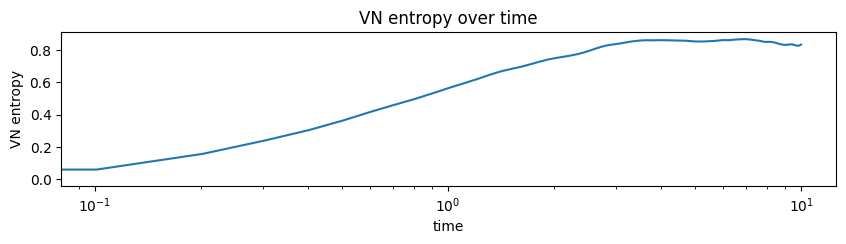

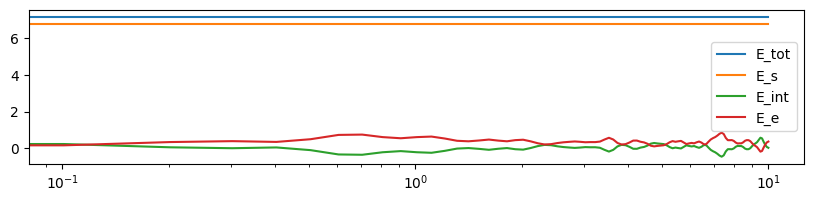

In [69]:
d1=10;d2=200;E_s=1; E_s2=0; E_int_s=0; E_int_e=1;E_int_s2=0.06;E_int_e2=0; E_e=1; E_e2=0;w=[0,0,0,np.sqrt(0.3),0,0,0,np.sqrt(0.7),0,0];envi=[0]; tmax= 10; ind_nb = 100;log=0
file_name="basic_decoherence"
result, tlist, H_list, ket_list, info = time_evo_new(d1,d2,E_s,E_s2,E_int_s,E_int_e,E_int_s2,E_int_e2,E_e,E_e2,w,envi,tmax,ind_nb,log)

plot_VN(result,tlist,1)
plt.show()
[E_tot,E_s,E_int,E_e]=exp_val_time(result, H_list, tlist)
plt.figure(figsize=(10, 2))
plt.plot(tlist,E_tot)
plt.plot(tlist,E_s)
plt.plot(tlist,E_int)
plt.plot(tlist,E_e)

plt.xscale("log")
plt.legend(["E_tot","E_s","E_int","E_e"])
plt.show()

#plot_hamiltonians(H_list)

In [70]:
#eigen = eig(H_list)
s_list_ = compute_schmidt_states_all_time(result, ind_nb)
ss_list_ = s_list_[0]
se_list_= s_list_[1]
sv_list_ = s_list_[2]
s_full_list=s_list_[3]
s_full_list_1_=s_full_list_new_qt(ss_list_,se_list_,0)
s_full_list_2_=s_full_list_new_qt(ss_list_,se_list_,1)


In [71]:

w1_list=worlds(s_full_list_1_, ind_nb,0)
w2_list=worlds(s_full_list_2_, ind_nb,1)


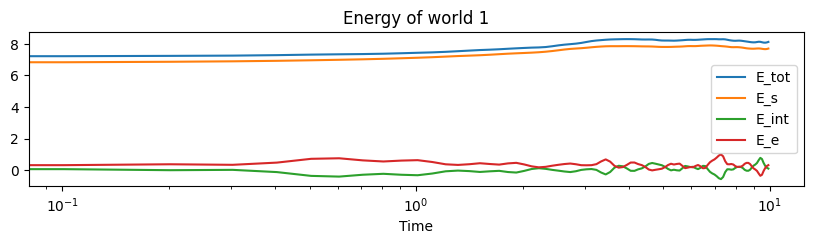

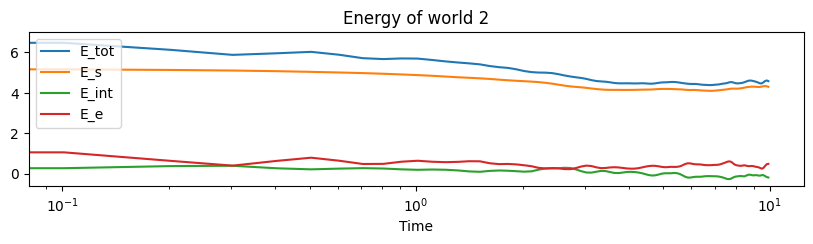

In [72]:

[E_tot_w1,E_s_w1,E_int_w1,E_e_w1]=exp_val_time_world(w1_list, H_list, tlist)
[E_tot_w2,E_s_w2,E_int_w2,E_e_w2]=exp_val_time_world(w2_list, H_list, tlist)
plt.figure(figsize=(10, 2))
plt.plot(tlist[:-1],E_tot_w1)
plt.plot(tlist[:-1],E_s_w1)
plt.plot(tlist[:-1],E_int_w1)
plt.plot(tlist[:-1],E_e_w1)
plt.xscale("log")
plt.xlabel("Time")
plt.title("Energy of world 1")
plt.legend(["E_tot","E_s","E_int","E_e"])
plt.show()

plt.figure(figsize=(10, 2))
plt.plot(tlist[:-1],E_tot_w2)
plt.plot(tlist[:-1],E_s_w2)
plt.plot(tlist[:-1],E_int_w2)
plt.plot(tlist[:-1],E_e_w2)
plt.title("Energy of world 2")
plt.xlabel("Time")
plt.xscale("log")
plt.legend(["E_tot","E_s","E_int","E_e"])
plt.show()